In [1]:
from Neuron_analysis_tool.Analyzer import Analyzer, long_pulse_protocol, short_pulse_protocol
from Neuron_analysis_tool.protocols import spike_protocol2, spike_protocol3

from neuron import gui, h
import numpy as np
import os
import matplotlib.pyplot as plt
from copy import deepcopy
from Neuron_analysis_tool.Video import create_movie_from_rec


NEURON: unable to open font "*helvetica-medium-r-normal*--14*", using "fixed"


## Loading  model

In [2]:

# analyser = Analyzer(type='Rall_tree')
# colors_dict  = analyser.colors_dict
# colors_dict['soma']='r'
# colors_dict['basal']='pink'

# analyser.change_color_dict(colors_dict)

analyser = Analyzer(type='L5PC')

In [3]:
def Ca_spike_protocol(cell, start_seg):
    delay=400.0
    stim = h.IClamp(0.5, sec=cell.soma[0])
    stim.dur   = 5
    stim.delay = delay

    syn = h.epsp(cell.apic[36](0.9))
    syn.tau0  = 0.5
    syn.tau1 = 5
    syn.onset   = stim.delay + 5
    syn.imax = 0.5 
    stim.amp = 1.9
    
    h.tstop = 400 + 150
    h.v_init = cell.soma[0].e_pas
    h.celsius = 37
    h.run()
    return 400, {}

## creating a movie of voltage response to a somatic stimulated spikes

In [4]:
show_records_from = dict()
show_records_from[list(analyser.cell.soma[0])[0]] = dict(label='soma', alpha=0.75, color='lime', size=50)
show_records_from[list(analyser.cell.apic[29])[-1]] = dict(label='tip', alpha=0.75, color='grey', size=50)


In [5]:
records, extra = analyser.record_protocol(protocol=Ca_spike_protocol, record_names=['v', 'gCa_LVAst_Ca_LVAst'], compute_more_condunctances=True)
record_dict = records.all_records['v']
record_dict2 = records.all_records['gCa_LVAst_Ca_LVAst']

more_conductances_ = extra['more_conductances']

In [6]:
start_seg = list(analyser.cell.soma[0])[0]

Exception: not a valid plot_typeall_records

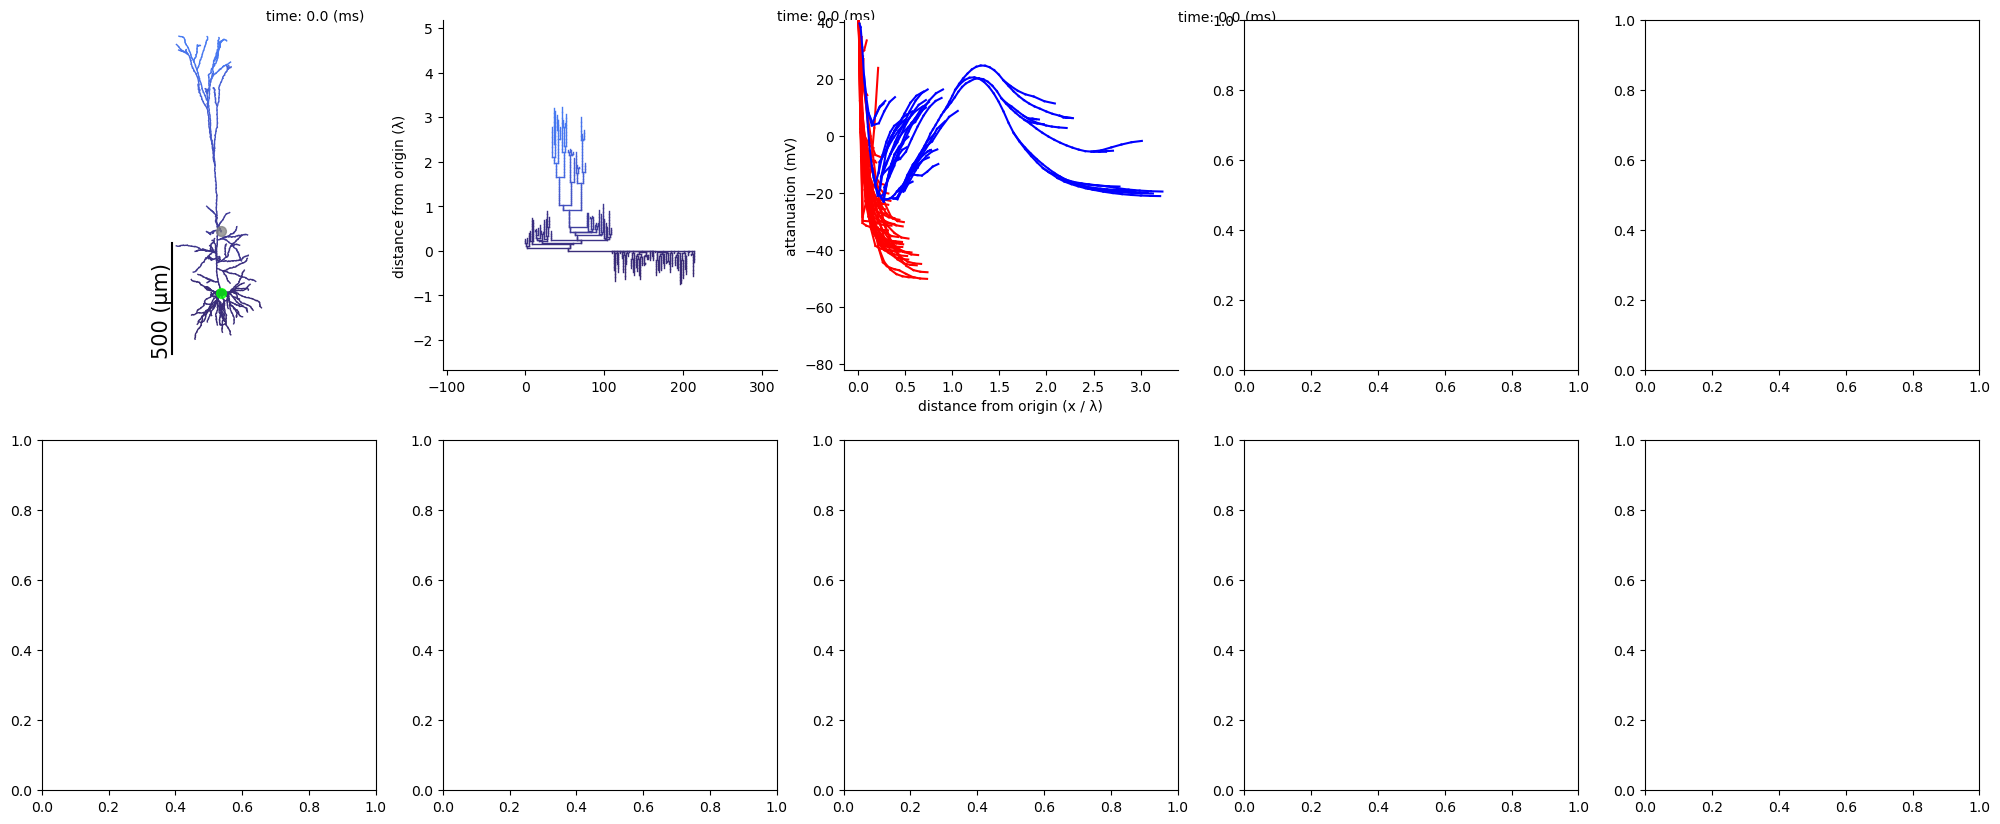

In [9]:
fig, ax = plt.subplots(2, 5, figsize=(25,10))

plot_kwargs = [
    dict(ax=ax[0, 0], seg = start_seg, records=record_dict, electrical=False, plot_type='morph', seg_to_indicate_dict=show_records_from,plot_color_bar=False, theta=270),
    dict(ax=ax[0, 1], seg = start_seg, records=record_dict, electrical=True, plot_type='dendogram', plot_color_bar=False, dancing=True, more_conductances_=more_conductances_),
    dict(ax=ax[0, 2], seg = start_seg, records=record_dict, electrical=True, plot_type='attenuation'),
    dict(ax=ax[0, 3], seg = start_seg, records=record_dict, distance_factor=1, plot_every=0.25, plot_type='all_records'),
    dict(ax=ax[0, 4], seg = start_seg, records=record_dict, plot_type='single_record'),
    
    dict(ax=ax[1, 0], seg = start_seg, records=record_dict2, electrical=False, plot_type='morph', seg_to_indicate_dict=show_records_from,plot_color_bar=False, theta=270),
    dict(ax=ax[1, 1], seg = start_seg, records=record_dict2, electrical=True, plot_type='dendogram', plot_color_bar=False, dancing=True, more_conductances_=more_conductances_),
    dict(ax=ax[1, 2], seg = start_seg, records=record_dict2, electrical=True, plot_type='attenuation', margin=0),
    dict(ax=ax[1, 3], seg = start_seg, records=record_dict2, distance_factor=0, plot_every=0.25, plot_type='all_records'),
    dict(ax=ax[1, 4], seg = start_seg, records=record_dict2, plot_type='single_record'),

              ]

slow_down_factor=20
animation = create_movie_from_rec(analyser, fig, slow_down_factor=slow_down_factor, plot_kwargs=plot_kwargs)
animation.write_videofile(os.path.join('', 'multi_3.mp4'),
                          fps=5, threads=4,
                          audio=False, preset='ultrafast')

animation.ipython_display(fps=5, loop=True, autoplay=True, maxduration=animation.duration+10)

In [8]:
from Neuron_analysis_tool.Video import create_movie_from_rec


In [ ]:
records, extra = analyser.record_protocol(protocol=spike_protocol3,cut_start_ms=1000.0, record_names=['v', 'gCa_LVAst_Ca_LVAst'], compute_more_condunctances=True)
record_dict = records.all_records['v']
record_dict2 = records.all_records['gCa_LVAst_Ca_LVAst']

more_conductances_ = extra['more_conductances']

duration= 10.74500000003909
0.0



                                                                                                                                                                                                            
t:  19%|█████████████████████████████                                                                                                                                | 10/54 [15:10<00:42,  1.03it/s, now=None]
                                                                                                                                                                                                            
t:  19%|█████████████████████████████                                                                                                                                | 10/54 [15:10<00:42,  1.03it/s, now=None]

Moviepy - Building video multi_1.mp4.
Moviepy - Writing video multi_1.mp4



t:   0%|                                                                                                                                                                      | 0/54 [00:00<?, ?it/s, now=None]

0.0


t:   4%|█████▊                                                                                                                                                        | 2/54 [00:00<00:22,  2.36it/s, now=None]

1.0


t:   6%|████████▊                                                                                                                                                     | 3/54 [00:01<00:32,  1.59it/s, now=None]

2.0


t:   7%|███████████▋                                                                                                                                                  | 4/54 [00:02<00:36,  1.36it/s, now=None]

3.0000000000000004


t:   9%|██████████████▋                                                                                                                                               | 5/54 [00:03<00:38,  1.28it/s, now=None]

4.0


t:  11%|█████████████████▌                                                                                                                                            | 6/54 [00:04<00:39,  1.21it/s, now=None]

5.0


t:  13%|████████████████████▍                                                                                                                                         | 7/54 [00:05<00:40,  1.16it/s, now=None]

6.000000000000001


t:  15%|███████████████████████▍                                                                                                                                      | 8/54 [00:06<00:40,  1.13it/s, now=None]

7.000000000000001


t:  17%|██████████████████████████▎                                                                                                                                   | 9/54 [00:07<00:40,  1.12it/s, now=None]

8.0


t:  19%|█████████████████████████████                                                                                                                                | 10/54 [00:08<00:39,  1.13it/s, now=None]

9.000000000000002


t:  20%|███████████████████████████████▉                                                                                                                             | 11/54 [00:08<00:38,  1.13it/s, now=None]

10.0


t:  22%|██████████████████████████████████▉                                                                                                                          | 12/54 [00:09<00:37,  1.13it/s, now=None]

11.000000000000002


t:  24%|█████████████████████████████████████▊                                                                                                                       | 13/54 [00:10<00:36,  1.12it/s, now=None]

12.000000000000002


t:  26%|████████████████████████████████████████▋                                                                                                                    | 14/54 [00:11<00:35,  1.13it/s, now=None]

13.000000000000002


t:  28%|███████████████████████████████████████████▌                                                                                                                 | 15/54 [00:12<00:34,  1.12it/s, now=None]

14.000000000000002


t:  30%|██████████████████████████████████████████████▌                                                                                                              | 16/54 [00:13<00:37,  1.02it/s, now=None]

15.0


t:  31%|█████████████████████████████████████████████████▍                                                                                                           | 17/54 [00:14<00:35,  1.05it/s, now=None]

16.0


t:  33%|████████████████████████████████████████████████████▎                                                                                                        | 18/54 [00:15<00:34,  1.06it/s, now=None]

17.0


t:  35%|███████████████████████████████████████████████████████▏                                                                                                     | 19/54 [00:16<00:32,  1.07it/s, now=None]

18.000000000000004


t:  37%|██████████████████████████████████████████████████████████▏                                                                                                  | 20/54 [00:17<00:31,  1.07it/s, now=None]

19.000000000000004


t:  39%|█████████████████████████████████████████████████████████████                                                                                                | 21/54 [00:18<00:30,  1.07it/s, now=None]

20.0


t:  41%|███████████████████████████████████████████████████████████████▉                                                                                             | 22/54 [00:19<00:30,  1.07it/s, now=None]

21.0


t:  43%|██████████████████████████████████████████████████████████████████▊                                                                                          | 23/54 [00:20<00:29,  1.06it/s, now=None]

22.000000000000004


t:  44%|█████████████████████████████████████████████████████████████████████▊                                                                                       | 24/54 [00:21<00:28,  1.07it/s, now=None]

23.000000000000004


t:  46%|████████████████████████████████████████████████████████████████████████▋                                                                                    | 25/54 [00:22<00:26,  1.09it/s, now=None]

24.000000000000004


t:  48%|███████████████████████████████████████████████████████████████████████████▌                                                                                 | 26/54 [00:22<00:25,  1.08it/s, now=None]

25.0


t:  50%|██████████████████████████████████████████████████████████████████████████████▌                                                                              | 27/54 [00:23<00:24,  1.10it/s, now=None]

26.000000000000004


t:  52%|█████████████████████████████████████████████████████████████████████████████████▍                                                                           | 28/54 [00:24<00:23,  1.11it/s, now=None]

27.000000000000004


t:  54%|████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 29/54 [00:25<00:22,  1.13it/s, now=None]

28.000000000000004


t:  56%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 30/54 [00:26<00:21,  1.12it/s, now=None]

29.000000000000004


t:  57%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 31/54 [00:27<00:20,  1.12it/s, now=None]

30.0


t:  59%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                | 32/54 [00:28<00:19,  1.13it/s, now=None]

31.0


t:  61%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 33/54 [00:29<00:20,  1.05it/s, now=None]

32.0


t:  63%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 34/54 [00:30<00:18,  1.07it/s, now=None]

33.0


t:  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 35/54 [00:31<00:17,  1.10it/s, now=None]

34.0


t:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 36/54 [00:31<00:16,  1.11it/s, now=None]

35.0


t:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 37/54 [00:32<00:15,  1.12it/s, now=None]

36.00000000000001


t:  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 38/54 [00:33<00:14,  1.11it/s, now=None]

37.00000000000001


t:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 39/54 [00:34<00:13,  1.12it/s, now=None]

38.00000000000001


t:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 40/54 [00:35<00:12,  1.11it/s, now=None]

39.00000000000001


t:  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 41/54 [00:36<00:11,  1.13it/s, now=None]

40.0


t:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 42/54 [00:37<00:10,  1.12it/s, now=None]

41.00000000000001


t:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 43/54 [00:38<00:09,  1.14it/s, now=None]

42.0


t:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 44/54 [00:39<00:08,  1.14it/s, now=None]

43.0


t:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 45/54 [00:39<00:07,  1.14it/s, now=None]

44.00000000000001


t:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 46/54 [00:40<00:06,  1.15it/s, now=None]

45.0


t:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 47/54 [00:41<00:06,  1.14it/s, now=None]

46.00000000000001


t:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 48/54 [00:42<00:05,  1.14it/s, now=None]

47.0


t:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 49/54 [00:43<00:04,  1.15it/s, now=None]

48.00000000000001


t:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 50/54 [00:44<00:03,  1.06it/s, now=None]

49.0


t:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 51/54 [00:45<00:02,  1.09it/s, now=None]

50.0


t:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 52/54 [00:46<00:01,  1.11it/s, now=None]

51.00000000000001


t:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 53/54 [00:47<00:00,  1.13it/s, now=None]

52.00000000000001


t: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:47<00:00,  1.14it/s, now=None]

53.00000000000001


                                                                                                                                                                                                               
                                                                                                                                                                                                            
t:  19%|█████████████████████████████                                                                                                                                | 10/54 [15:59<00:42,  1.03it/s, now=None]
                                                                                                                                                                                                            
t:  19%|█████████████████████████████                                                                                                                                | 10/54 [

Moviepy - Done !
Moviepy - video ready multi_1.mp4
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



t:   0%|                                                                                                                                                                      | 0/54 [00:00<?, ?it/s, now=None]

0.0


AssertionError: the time bins have no are not corect, t1=53.00000000000001, t2=0.0

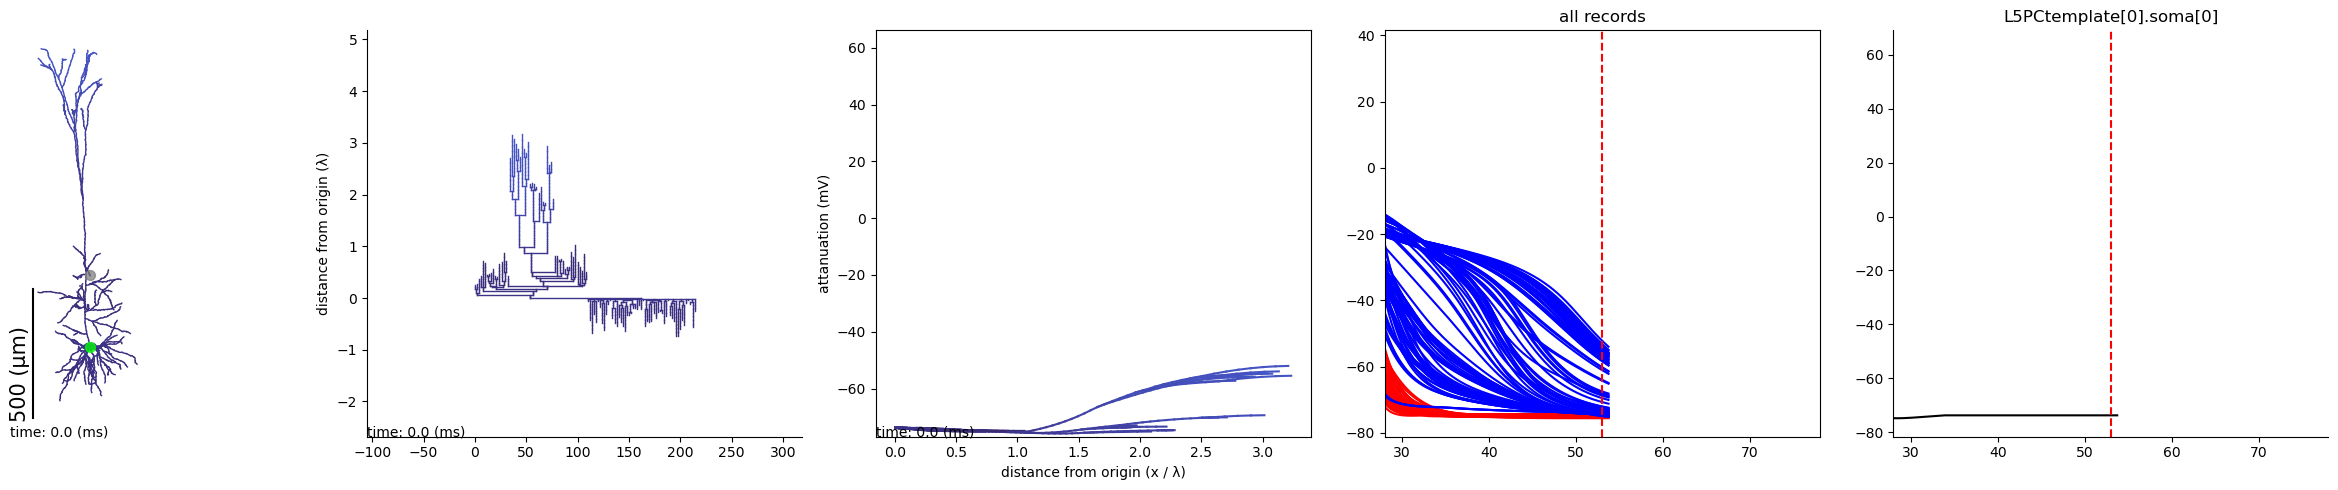

In [8]:
fig, ax = plt.subplots(1,5, figsize=(25,5))

plot_kwargs = [
    dict(ax=ax[0], seg = start_seg, records=record_dict, electrical=False, plot_type='morph', seg_to_indicate_dict=show_records_from,plot_color_bar=False, theta=270),
    dict(ax=ax[1], seg = start_seg, records=record_dict, electrical=True, plot_type='dendogram', plot_color_bar=False, dancing=True, more_conductances_=more_conductances_),
    dict(ax=ax[2], seg = start_seg, records=record_dict, electrical=True, plot_type='attenuation'),
    dict(ax=ax[3], seg = start_seg, records=record_dict, distance_factor=1, plot_every=0.25, plot_type='all_records'),
    dict(ax=ax[4], seg = start_seg, records=record_dict, plot_type='single_record'),
              ]

slow_down_factor=200
animation = create_movie_from_rec(analyser, fig, slow_down_factor=slow_down_factor, plot_kwargs=plot_kwargs)
animation.write_videofile(os.path.join('', 'multi_1.mp4'),
                          fps=5, threads=4,
                          audio=False, preset='ultrafast')

animation.ipython_display(fps=5, loop=True, autoplay=True, maxduration=animation.duration+10)

In [10]:
record_dict.time[0]

0.0

In [ ]:
record_dict, extra = analyser.record_protocol(protocol=short_pulse_protocol,cut_start_ms=1000.0, record_name='v', compute_more_condunctances)
